# 2. Análisis de Datos Exproratorio (EDA)

In [91]:
import pandas as pd
import numpy as np
import json # Para trabajar con JSON
from pandas import json_normalize
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.corpus import stopwords
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Recarga automática de módulos antes de ejecutar
#%load_ext autoreload
#%autoreload 2

# Descargar los stopwords en español e inglés
nltk.download('stopwords')
stop_words = set(stopwords.words('english') + stopwords.words('spanish'))

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to C:\Users\JS
[nltk_data]     Digital\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Introducción: 
El presente análisis exploratorio de los datos (EDA) se realiza con el objetivo de realizar un sistema de recomendaciones de películas basado en el título, es por ello, que se busca entender cómo se relacionan los datos con el interés que generan las películas a los usuarios, identificando similitudes y atributos claves. A través del EDA, buscamos identificar patrones y relaciones en el conjunto de datos. 

### 1. Carga y revisión inicial de los datos

In [92]:
# Cargamos los datos limpios en un df
df=pd.read_parquet('D:/2024/HenryData/Py_Individual/PI_Recomendacion/Datasets/df_limpio.parquet')

In [93]:
df.head(2)

,id,belongs_to_collection,budget,genres,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,actor,director,return
0,862,Toy Story Collection,30000000,"Animation, Comedy, Family","Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,English,Toy Story,7.7,5415.0,1995,"Tom Hanks, Tim Allen, Don Rickles",John Lasseter,12.451801
1,8844,No collecction,65000000,"Adventure, Fantasy, Family",When siblings Judy and Peter discover an encha...,17.015539,TriStar Pictures Teitler Film Interscope Commu...,United States of America,1995-12-15,262797249.0,104.0,"English, Français",Jumanji,6.9,2413.0,1995,"Robin Williams, Jonathan Hyde, Kirsten Dunst",Joe Johnston,4.043035


In [94]:
# Información general del DF
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21875 entries, 0 to 21874
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     21875 non-null  int32         
 1   belongs_to_collection  21875 non-null  object        
 2   budget                 21875 non-null  int64         
 3   genres                 21875 non-null  object        
 4   overview               21875 non-null  object        
 5   popularity             21875 non-null  float64       
 6   production_companies   21875 non-null  object        
 7   production_countries   21875 non-null  object        
 8   release_date           21875 non-null  datetime64[ns]
 9   revenue                21875 non-null  float64       
 10  runtime                21853 non-null  float64       
 11  spoken_languages       21875 non-null  object        
 12  title                  21875 non-null  object        
 13  v

Estadísticas de las columnas numéricas

In [95]:
# Observamos una descripción estadística de las columnas numéricas
df. describe()

,id,budget,popularity,release_date,revenue,runtime,vote_average,vote_count,release_year,return
count,21875.000000,2.187500e+04,21875.000000,21875,2.187500e+04,21853.000000,21875.000000,21875.000000,21875.000000,2.187500e+04
mean,109612.290971,8.239313e+06,4.381674,2004-09-30 12:31:45.737142784,2.154692e+07,96.544822,5.667031,198.929509,2004.256549,9.799200e+02
min,3.000000,0.000000e+00,0.000000,1981-01-01 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,1981.000000,0.000000e+00
25%,18122.500000,0.000000e+00,0.750121,1998-01-01 00:00:00,0.000000e+00,87.000000,5.000000,6.000000,1998.000000,0.000000e+00
50%,50674.000000,0.000000e+00,2.211854,2007-03-28 00:00:00,0.000000e+00,95.000000,5.900000,19.000000,2007.000000,0.000000e+00
75%,173482.000000,2.000000e+06,6.571817,2012-11-02 00:00:00,1.046585e+05,106.000000,6.700000,84.000000,2012.000000,0.000000e+00
max,465044.000000,3.800000e+08,547.488298,2020-12-16 00:00:00,2.787965e+09,1140.000000,10.000000,14075.000000,2020.000000,1.239638e+07
std,121397.401254,2.423314e+07,8.004797,NaN,9.016443e+07,33.493147,1.623697,682.421140,9.667968,9.094002e+04


Interpretación: 

- Count, Indica que casi todas las columnas hay 21,875 películas, excepto en la columna *runtime* 21,853, lo que indica que hay algunas filas con valores faltantes (NaN).

- En el caso de la columna *budget*, el presupuesto promedio de las películas de este conjunto de datos es de aproximadamente 8.24 millones de dólares. En la columna *revenue* indica que en promedio las películas de este conjunto de datos recaudo 2.15 millones de dólares.

- En cuanto a las columnas *budget* y *revenue*; el valor mínimo es 0 los que indica que películas sin presupuesto y recaudación declarado.

- En el caso del *budget*, indica que el presupuesto más alto registrado en el conjunto de datos es de 3.8 millones de dolares.

- En general la mayoría de las películas tienen un *presupuesto* bajo o no estan declarados, también se observa que un número pequeño de películas tienen presupuesto muy altos.

- La *popularity*, tiene un rango amplio, como si algunas películas fueran extremadamente populares, lo que nos indica que podríamos estar frente a un valor atípico.

### 2. Valores faltantes y limpieza

In [96]:
# Revisamos la cantidad de valores nulos por columna
print(df.isnull().sum())

id                         0
belongs_to_collection      0
budget                     0
genres                     0
overview                   0
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                   22
spoken_languages           0
title                      0
vote_average               0
vote_count                 0
release_year               0
actor                      0
director                 244
return                     0
dtype: int64


Se observa que las columnas 'runtime' y 'director' presentan valores nulos, por ello se procede a llenar o eliminar 

In [97]:
# Para el caso de runtime se procede a llenar con la medina de la columna.
df['runtime'].fillna(df['runtime'].median(), inplace=True)

In [98]:
# Para el caso de la columna director, se procede a eliminar las filas con los valores faltantes
df.dropna(subset=['director'], inplace=True)

In [99]:
# Revisamos los cambios
print(df.isnull().sum())

id                       0
belongs_to_collection    0
budget                   0
genres                   0
overview                 0
popularity               0
production_companies     0
production_countries     0
release_date             0
revenue                  0
runtime                  0
spoken_languages         0
title                    0
vote_average             0
vote_count               0
release_year             0
actor                    0
director                 0
return                   0
dtype: int64


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21631 entries, 0 to 21874
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     21631 non-null  int32         
 1   belongs_to_collection  21631 non-null  object        
 2   budget                 21631 non-null  int64         
 3   genres                 21631 non-null  object        
 4   overview               21631 non-null  object        
 5   popularity             21631 non-null  float64       
 6   production_companies   21631 non-null  object        
 7   production_countries   21631 non-null  object        
 8   release_date           21631 non-null  datetime64[ns]
 9   revenue                21631 non-null  float64       
 10  runtime                21631 non-null  float64       
 11  spoken_languages       21631 non-null  object        
 12  title                  21631 non-null  object        
 13  vote_a

In [101]:
# Observamos la variable de tipo object
df['actor'][:3]

0               Tom Hanks, Tim Allen, Don Rickles
1    Robin Williams, Jonathan Hyde, Kirsten Dunst
2        Walter Matthau, Jack Lemmon, Ann-Margret
Name: actor, dtype: object

In [102]:
# Reemplazamos valores 'nan', a valores np.nan, para que pandas lo puede interpretar como valores faltantes reales
df.replace('nan',np.nan, inplace=True)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21631 entries, 0 to 21874
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     21631 non-null  int32         
 1   belongs_to_collection  21631 non-null  object        
 2   budget                 21631 non-null  int64         
 3   genres                 21631 non-null  object        
 4   overview               21631 non-null  object        
 5   popularity             21631 non-null  float64       
 6   production_companies   21631 non-null  object        
 7   production_countries   21631 non-null  object        
 8   release_date           21631 non-null  datetime64[ns]
 9   revenue                21631 non-null  float64       
 10  runtime                21631 non-null  float64       
 11  spoken_languages       21631 non-null  object        
 12  title                  21631 non-null  object        
 13  vote_a

### 3. Relación entre las variables numéricas:

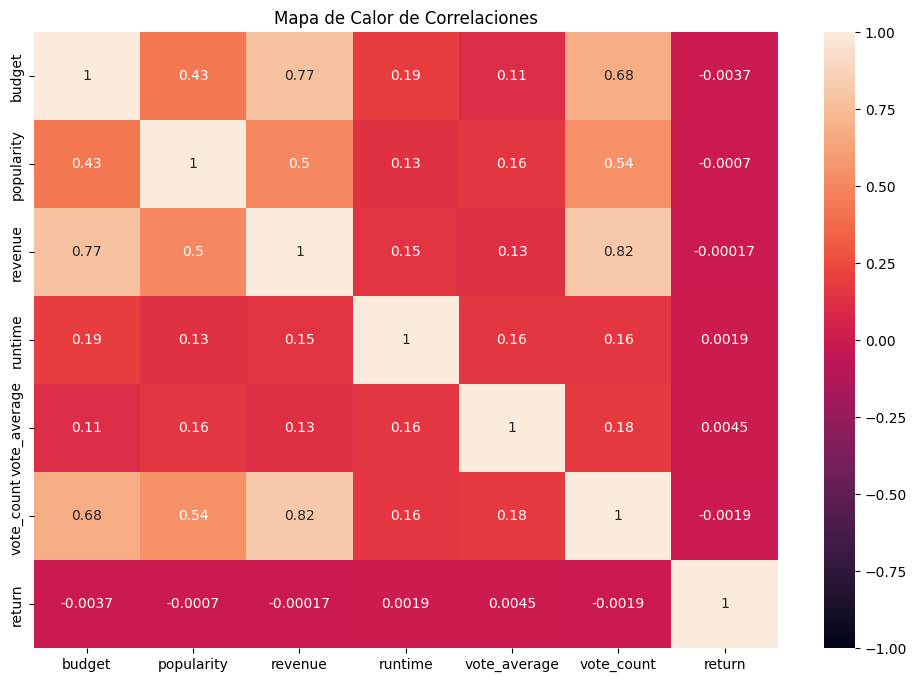

In [104]:
# Visualización de variables numéricas
numerical_cols = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'return']
# Mapa de calor para visualizar correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, vmax=1, vmin=-1)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

*Interpretación:*

- budget (presupuesto) y revenue (ingresos), correlación de 0.77, fuerte correlación positiva. Esto indica que a mayor presupuesto, es probable que los ingresos también sean mayores.

- revenue (ingresos) y vote_count (número de votos), correlación de 0.82, fuerte correlación positiva. Las películas con mayores ingresos tienden a tener más votos, lo que sugiere una relación entre éxito financiero y popularidad.

- budget (presupuesto) y vote_count, correlación de 0.68, correlación positiva moderada. Las películas con mayores presupuestos también tienden a recibir más votos, lo que puede reflejar que las producciones más caras atraen más audiencia.

- popularity (popularidad) y vote_count, correlación de 0.54, correlación positiva moderada. Las películas más populares tienden a recibir más votos, lo que es razonable porque la popularidad generalmente está asociada con la visibilidad.

- return (retorno) con otras variables, la correlación de return con las demás variables son muy cercanos a 0, lo que indica poca o ninguna correlación. Esto sugiere que el retorno de inversión no depende directamente del presupuesto, popularidad, número de votos, o ingresos para estos datos.

**Conclusión:**

Las variables budget, renvenue y vote_count, estan bastante correlacionadas entre sí, lo que indica que estas métrica están interrelacionadas con la visibilidad de la película.

Por otra parte el retorno de la inversión no esta relacionada directamente con los factores que afectan la rentabilidad de una película.

La correlación entre popularity y otras variables como revenue y vote_coun, podría indicarnos una influencia en la visibilidad de una película, pero no de forma directa.




### 4. Procesamiento y análisis las variables que contienen texto

Columna 'title' que corresponde a los títulos de las películas

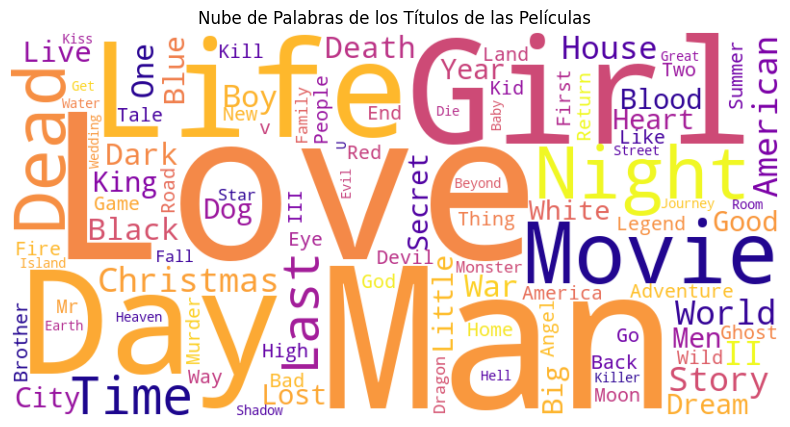

In [105]:
# Concatenamos todas las descripciones del título en una sola cadena
texto_nube = ' '.join(df['title'])

# Creamos la nube de palabras
nube_palabras = WordCloud(stopwords=stop_words, background_color='white', max_words=100, width=800, height=400, colormap='plasma').generate(texto_nube)

# Mostramos la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(nube_palabras, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de los Títulos de las Películas')
plt.show()


Interpretación y análisis de la nube de palabras:
- Las palabras más relevantes como 'love', nos indica que el amor es un tema central en muchas de las películas, lo cual es común en géneros como el romance y los dramas.
- Las palabras 'Man' y 'Gril', nos indican que muchos de los títulos se centran en personajes específicos o enfatizan roles de género.
- Las palabras relacionadas al tiempo 'Time', 'Night' y 'Day', podrían estan relacionadas con tramas de acción, misterio o aventuras que ocurren en un tiempo determinado.
- Tambien se encontrado temas comunes por ejemplo las palabras como 'Dead', 'Death', 'Devil', y 'Dark' sugieren que hay un número significativo de películas con temas oscuros, de suspenso o de terror. Términos como 'Christmas' y 'Angel podrían indicar la popularidad de películas de temática navideña o sobrenatural, y finalmente 'Secret', 'Ghost', y 'House' son términos que sugieren la presencia de películas de misterio o terror.

Columna 'genres' que corresponde a los géneros de las películas

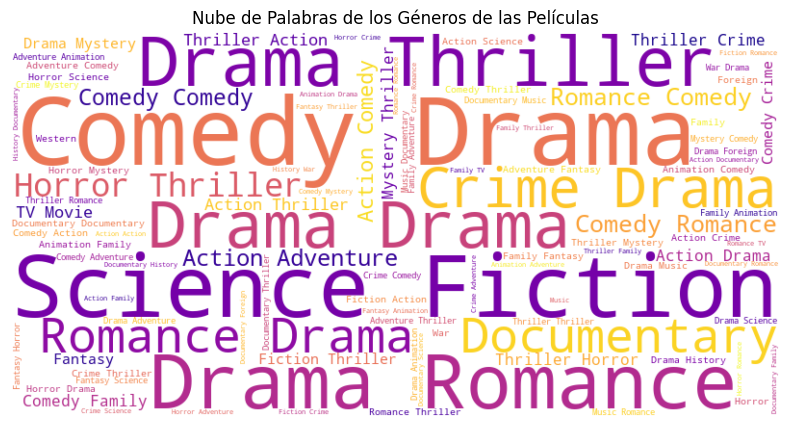

In [106]:
# Concatenamos todas las descripciones del género en una sola cadena
texto_nube = ' '.join(df['genres'].dropna().str.replace(',', ' '))

# Creamos la nube de palabras
nube_palabras = WordCloud(stopwords=stop_words, background_color='white', max_words=100, width=800, height=400, colormap='plasma').generate(texto_nube)

# Mostramos la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(nube_palabras, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de los Géneros de las Películas')
plt.show()

Interpretación y análisis de la nube de palabras:

- Los géneros principales identificados serían Drama, comedia, Romance y Ciencia Ficción.
- Los géneros secundarios serían thriller, horror, documental.
- También hay conbinaciones de género como: romance y drama, crimen y drama, comedia y romance.

Columna 'overview' que corresponde a los resumenes de las películas

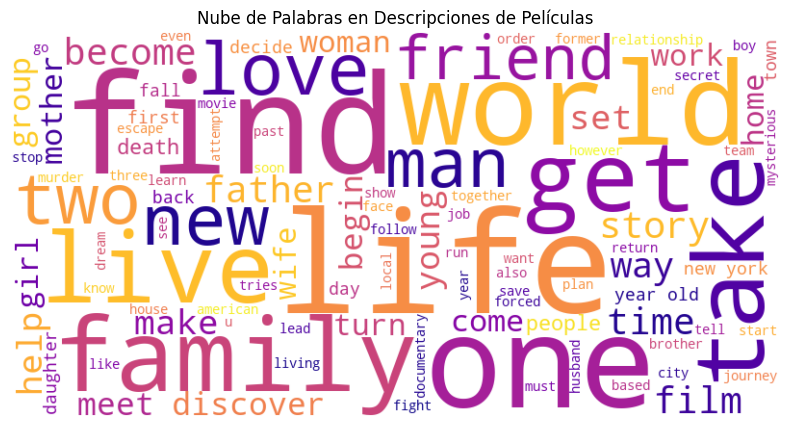

In [107]:
# Concatenamos todas las descripciones en un solo texto
texto_nube = ' '.join(df['overview'].fillna('').str.lower().str.replace(r'[^\w\s]', '').str.replace(r'\d+', ''))

# Creamos la nube de palabras
nube_palabras = WordCloud(stopwords=stop_words, background_color='white', max_words=100, width=800, height=400, colormap='plasma').generate(texto_nube)

# Mostramos la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(nube_palabras, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras en Descripciones de Películas')
plt.show()

Interpretación y análisis de la nube de palabra:

- Las plabras más relevantes 'life', 'family','love'. Esto indica que son palabras recurrentes en muchas de las películas, y estarían asociadas a temas sobre dinámicas familiares y relaciones humanas. Lo que indicaría que son películas relacionadas con el género de drama, romance, etc.

- Otro bloque de palabras relevantes son 'world', 'find', 'live'. Esto indica que las películas tratan sobre busqueda, decubrimiento o viajes, lo que podría estar asociada a películas de aventura o fantasía.

- One, two, man, friend, father, mother, woman, etc. Estas palabras son comunes en las descripciones de las películas, los cuales estarían indicando los personajes, o relaciones personales, por lo tanto la trama de estaría a conflictos emociales realacionados con la familia y la amistad.  

**Hallazgos en el análisis de las variables con contenido de texto:**
- Las palabras claves más destacadas en las nubes de palabras sugieren temas recurrentes que podrían ser útiles para clasificar o recomendar películas. Estas palabras resaltan similitudes temáticas que pueden faciliar la agrupación de películas con características afines.  

### 5. Análisis de las variables actor y director con la popularidad

In [108]:
df1c=df.copy()

Actores con más películas protagonizdas versus su popularidad

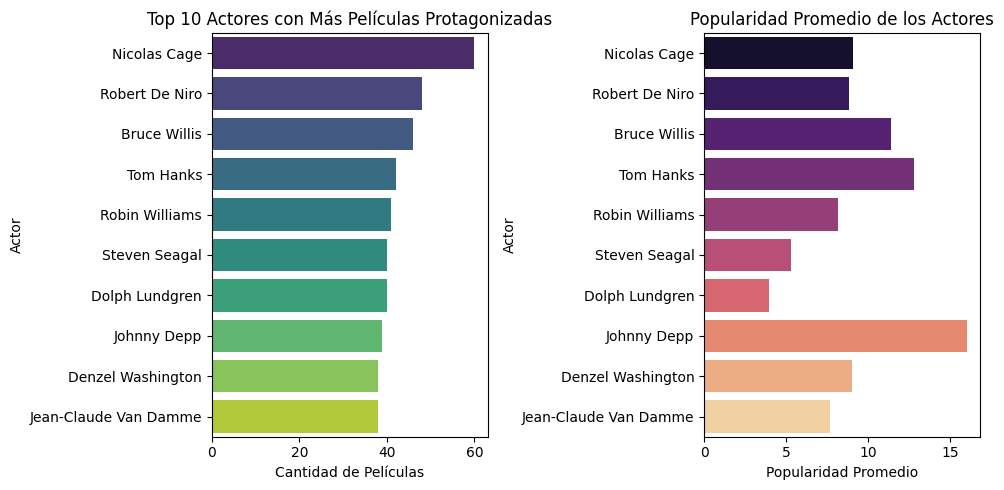

In [109]:

# Asegurar que no haya valores NaN en las columnas 'actors' y 'popularity'
df1c = df1c.dropna(subset=['actor', 'popularity'])

# Extraemos el primer actor de la lista y eliminar espacios innecesarios
df1c['first_actor'] = df1c['actor'].apply(lambda x: x.split(',')[0].strip() if pd.notna(x) else '')

# Filtramos las filas donde 'first_actor' no sea una cadena vacía
df1c = df1c[df1c['first_actor'] != '']

# Calculamos los 10 actores que más películas han protagonizado
top_actors = df1c['first_actor'].value_counts().head(10)
top_actors_names = top_actors.index.tolist()

# Filtramos el df para los actores más frecuentes
df_top_actors = df1c[df1c['first_actor'].isin(top_actors_names)]

# Calculamos la popularidad promedio para los actores más frecuentes
avg_popularity_actors = (
    df_top_actors.groupby('first_actor')['popularity']
    .mean()
    .reindex(top_actors_names)
    .reset_index()
    .rename(columns={'popularity': 'average_popularity'})
)

# Visualizamos los gráficos
plt.figure(figsize=(10, 5))
plt.style.use('default')

# Gráfico de los actores con más películas protagonizadas
plt.subplot(1, 2, 1)
sns.barplot(y=top_actors_names, x=top_actors.values, palette='viridis')
plt.title("Top 10 Actores con Más Películas Protagonizadas")
plt.xlabel("Cantidad de Películas")
plt.ylabel("Actor")

# Gráfico de popularidad promedio de los actores
plt.subplot(1, 2, 2)
sns.barplot(y=avg_popularity_actors['first_actor'], x=avg_popularity_actors['average_popularity'], palette='magma')
plt.title("Popularidad Promedio de los Actores")
plt.xlabel("Popularidad Promedio")
plt.ylabel("Actor")

plt.tight_layout()
plt.show()

Interpretación:

Los gráficos muestran que, aunque un actor haya protagonizado una gran cantidad de películas, esto no implica necesariamente que tenga una alta popularidad. Un ejemplo claro es Nicolas Cage, quien lidera el ranking con el mayor número de películas protagonizadas, pero tiene una popularidad promedio inferior a 10. En contraste, Johnny Depp, quien ocupa el octavo lugar en cantidad de películas, destaca con la mayor popularidad promedio, superando los 15 puntos. Esto sugiere que la popularidad de un actor no está directamente relacionada con la cantidad de películas en las que ha participado.

Observamos la popularidad de los actores independientemente de la cantidad de películas que hayan protagonizado

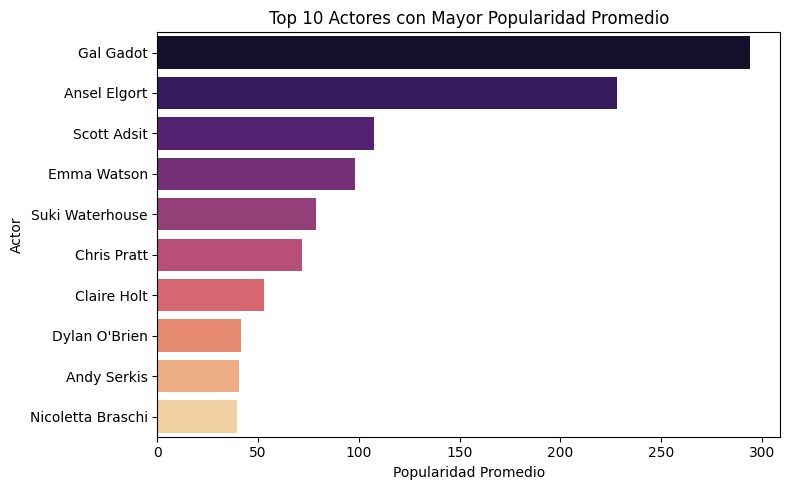

In [110]:

# Calcumos la popularidad promedio para cada actor
actor_popularity = (
    df1c.groupby('first_actor')['popularity']
    .mean()
    .reset_index()
    .sort_values(by='popularity', ascending=False)
)

# Seleccionar los 10 actores con mayor popularidad promedio
top_10_actors_popularity = actor_popularity.head(10)

# Visualización de los 10 actores con mayor popularidad promedio
plt.figure(figsize=(8, 5))
sns.barplot(y=top_10_actors_popularity['first_actor'], 
            x=top_10_actors_popularity['popularity'], 
            palette='magma')
plt.title("Top 10 Actores con Mayor Popularidad Promedio")
plt.xlabel("Popularidad Promedio")
plt.ylabel("Actor")
plt.tight_layout()
plt.show()

Interpretación:

El gráfico muestra a los diez actores con mayor popularidad independiente de la cantidad de películas protagonizadas.  Gal Gadot encabeza la lista, seguida de Ansel Elgort; ambos destacan sobre los demás actores; ello nos indica que estos actores tienen una fuerte conexión con el público o han participado en producciones particular mente exitosas o populares. Asímismo podríamos decir que estos actores en promedio generan mayor interés en el público, lo cual podría influir en el modelo de recomendación.

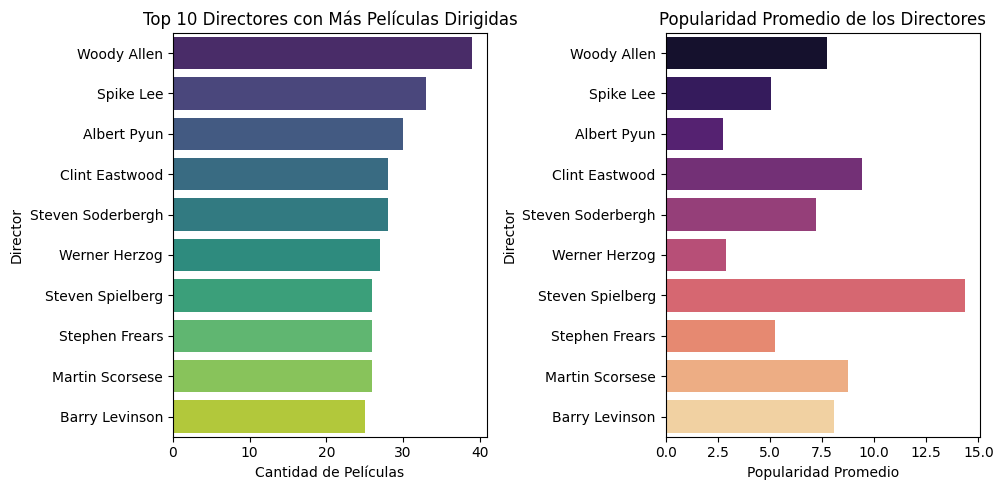

In [111]:
# Extraer el primer director de la lista y eliminar espacios innecesarios
df1c['first_director'] = df1c['director'].apply(lambda x: x.split(',')[0].strip() if pd.notna(x) else '')

# Obtener los 10 directores que más películas han dirigido
top_directors = df1c['first_director'].value_counts().head(10)
top_directors_names = top_directors.index.tolist()

# Filtrar el DataFrame para los directores más frecuentes
df_top_directors = df1c[df1c['first_director'].isin(top_directors_names)]

# Calcular la popularidad promedio para los directores más frecuentes
avg_popularity_directors = (
    df_top_directors.groupby('first_director')['popularity']
    .mean()
    .reindex(top_directors_names)
    .reset_index()
    .rename(columns={'popularity': 'average_popularity'})
)

# Visualización del análisis de directores
plt.figure(figsize=(10, 5))

# Gráfico de los directores con más películas dirigidas
plt.subplot(1, 2, 1)
sns.barplot(y=top_directors_names, x=top_directors.values, palette='viridis')
plt.title("Top 10 Directores con Más Películas Dirigidas")
plt.xlabel("Cantidad de Películas")
plt.ylabel("Director")

# Gráfico de popularidad promedio de los directores
plt.subplot(1, 2, 2)
sns.barplot(y=avg_popularity_directors['first_director'], x=avg_popularity_directors['average_popularity'], palette='magma')
plt.title("Popularidad Promedio de los Directores")
plt.xlabel("Popularidad Promedio")
plt.ylabel("Director")


plt.tight_layout()
plt.show()



Interpretación:

Los gráficos muestran que, aunque un director haya dirigido una gran cantidad de películas, esto no implica necesariamente que tenga una alta popularidad. Un ejemplo claro es Woody Allen, quien lidera el ranking con el mayor número de películas dirigidas, pero tiene una popularidad promedio inferior a 10. En contraste, Steven Spielberg, quien ocupa el septimo lugar en cantidad de películas dirigidas, y destaca con la mayor popularidad promedio, cercano a los 15 puntos. Esto sugiere que la popularidad de un director no está directamente relacionada con la cantidad de películas que ha dirigido.

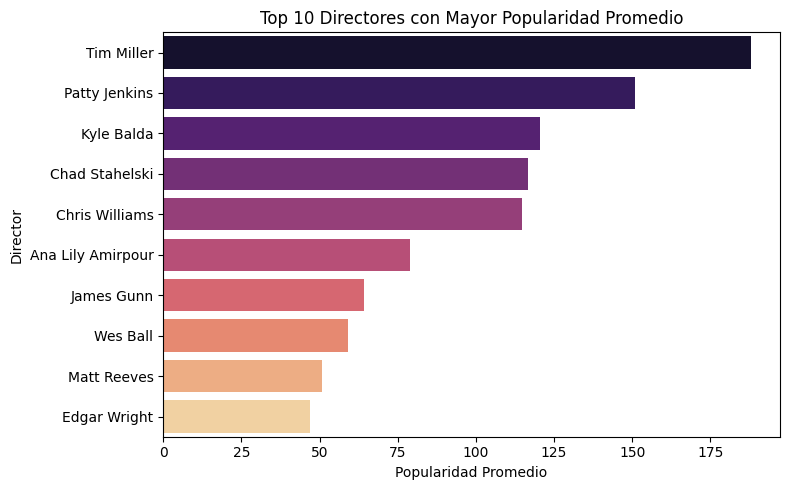

In [112]:

# Calcular la popularidad promedio para cada director
director_popularity = (
    df1c.groupby('first_director')['popularity']
    .mean()
    .reset_index()
    .sort_values(by='popularity', ascending=False)
)
# Seleccionar los 10 directores con mayor popularidad promedio
top_10_directors_popularity = director_popularity.head(10)


# Visualización de los 10 directores con mayor popularidad promedio
plt.figure(figsize=(8, 5))
sns.barplot(y=top_10_directors_popularity['first_director'], 
            x=top_10_directors_popularity['popularity'], 
            palette='magma')
plt.title("Top 10 Directores con Mayor Popularidad Promedio")
plt.xlabel("Popularidad Promedio")
plt.ylabel("Director")
plt.tight_layout()
plt.show()


Interpretación:

El gráfico muestra a los diez directores con mayor popularidad promedio, independientemente de la cantidad de películas dirigidas. Tim Miller encabeza la lista, seguido de Patty Jenkins. En general, esta lista sugiere que el público tiende a mostrar un mayor interés por las películas dirigidas por estos cineastas.

**Hallazgo sobre las variables actor, director y popularidad:**

Los análisis realizados muestran que la popularidad de actores y directores no está necesariamente correlacionada con la cantidad de películas en las que han participado o dirigido. Sino más bien el interés del público depende de la calidad de las películas que de la cantidad o la relevancia de las misma, por loque es importante considerar estas variables para el modelo de recomendación. 


### 6. Análisis de la cantidad de películas por año de lanzamiento

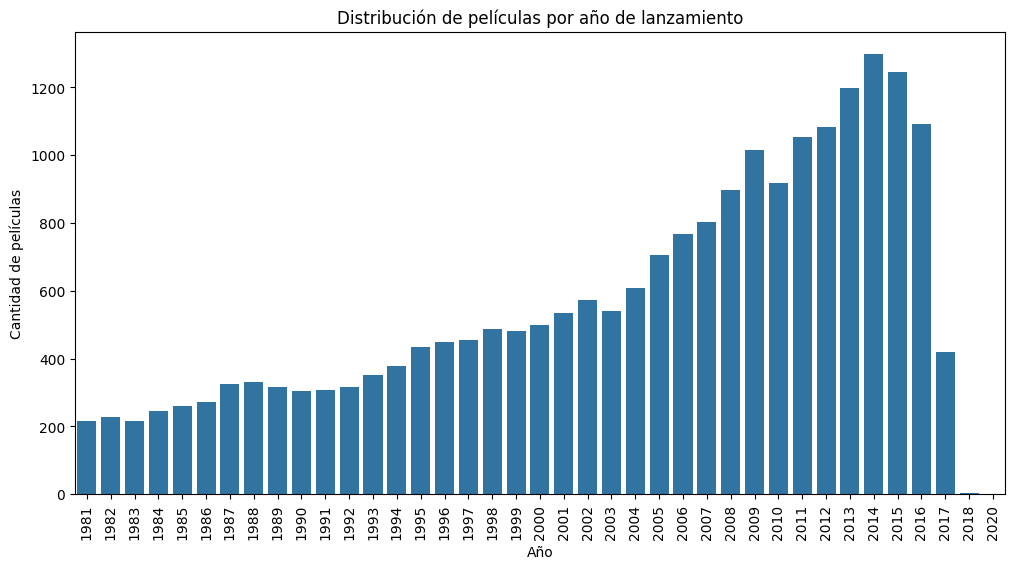

In [113]:
# Visualización del conteo de películas por año
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='release_year', order=sorted(df['release_year'].unique()))
plt.title('Distribución de películas por año de lanzamiento')
plt.xlabel('Año')
plt.ylabel('Cantidad de películas')
plt.xticks(rotation=90)
plt.show()

Interpretación:

Entre 1981 y 2014, la producción de películas mostró una tendencia creciente, alcanzando su punto máximo en 2014. A partir de 2015, sin embargo, se observa una disminución en el número de películas producidas, indicando una tendencia a la baja en los años posteriores.

### 7. Análisis del presupuesto y retorno 

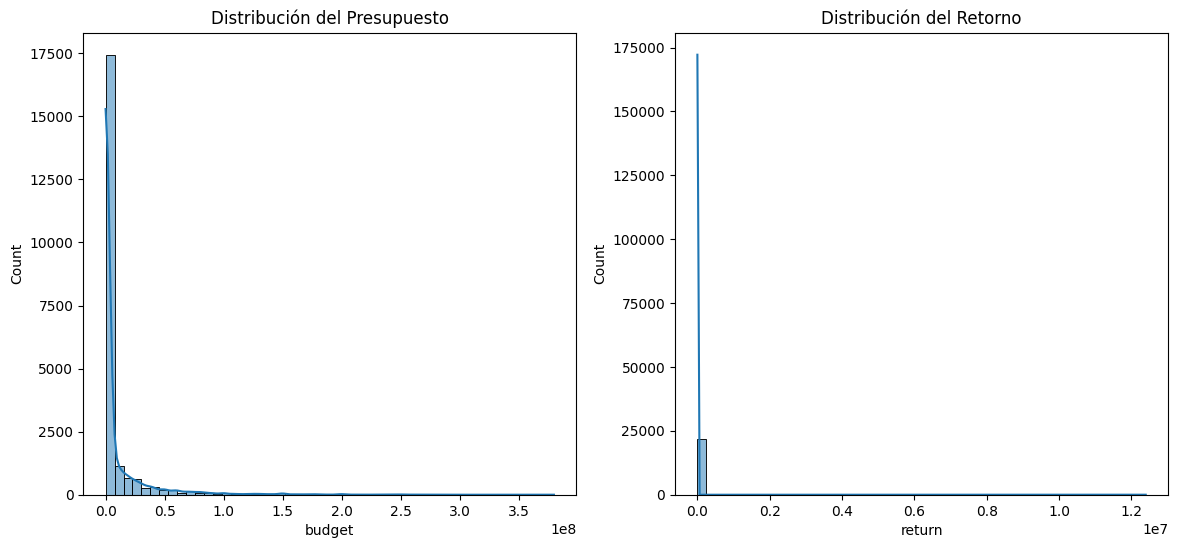

In [114]:
# Distribución de presupuesto y retorno
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df['budget'], bins=50, kde=True, ax=ax[0])
ax[0].set_title('Distribución del Presupuesto')

sns.histplot(df['return'], bins=50, kde=True, ax=ax[1])
ax[1].set_title('Distribución del Retorno')
plt.show()

Interpretación: 
- En ambas distribuciones presupuesto y retorno, se observa una alta concentración de valores bajos, es decir la mayoría de los presupuestos y retornos se encuentran cercanos a cero, mientras que muy pocos datos alcanzan valores altos. 
- Así también ambos gráficos presentan una fuerte asimetría a la derecha (sesgo a la derecha), indicándonos la existencia se de valores significamente mayores que la mayoría.
- Los valores extremadamente altos en ambas distribuciones prdrían ser outliers, ya que se alejan mucho de la mayoría de los datos. Los cuales pueden influir fuertemente en el modelo.

In [115]:
# Descriptivo de Presupuesto y Retorno
print(df[['budget', 'return']].describe())


             budget        return
count  2.163100e+04  2.163100e+04
mean   8.330690e+06  9.909736e+02
std    2.435351e+07  9.145145e+04
min    0.000000e+00  0.000000e+00
25%    0.000000e+00  0.000000e+00
50%    0.000000e+00  0.000000e+00
75%    2.000000e+06  0.000000e+00
max    3.800000e+08  1.239638e+07


Interpretación:
- Existe una alta variabilidad en los valores tanto del presupuesto como del retorno.
- En cuanto al valor mínimo tanto para el presupuesto como el retorno, es 0, lo que indica que hay películas sin prespuesto, y también sugiere que muchas películas no generaron ingresos o estos no fueron reportados.
- En general la gran cantidad de ceros en ambas variables, nos indica la falta de datos o que muchas perlículas realmente no reportan estos valores. Distorcionando el análisis y a su vez el modelo. 

Hallazgos y conclusiones:

En las distribuciones de presupuesto y retorno se observa una alta concentración de valores bajos, con un fuerte sesgo a la derecha, indicando la presencia de valores significativamente altos que podrían ser considerados outliers y que pueden influir en el análisis y en los modelos de manera desproporcionada. La alta variabilidad en ambas variables, junto con el hecho de que muchas películas tienen un presupuesto o un retorno de cero, sugiere datos incompletos o no reportados, distorsionando el análisis. Por estas razones, estas variables no se utilizarán en el modelo de recomendación, ya que su inclusión podría introducir sesgos y afectar la precisión de las predicciones. 
Además, no se realizaran análisis o tratamiento de outliers, debido a que se utilizaran variable de tipo string y que contribuyan al modelo de recomendación.

## Conclusiones Finales:

En base al análisis realizado las variables más útiles para un sistema de recomendación serían:

- id: Usada para identificar la película

- title: Usada para identificar y mostrar las películas recomendadas.

- genres: La similitud en los géneros es clave para agrupar películas con temas similares.

- overview: Puedes generar una matriz de similitud de texto a partir de descripciones.

- actor: Pueden ayudar a mejorar la relevancia de las recomendaciones.

- director: Pueden ayudar a mejorar la relevancia de las recomendaciones.

- belongs_to_collection: Usada para indicar la franquicia o serie de películas que pertenecen a la película.

In [123]:
var_model = ['id','title','genres','overview','actor','director', 'belongs_to_collection']
df_model = df[var_model]

In [124]:
df_model.head(2)

,id,title,genres,overview,actor,director,belongs_to_collection
0,862,Toy Story,"Animation, Comedy, Family","Led by Woody, Andy's toys live happily in his ...","Tom Hanks, Tim Allen, Don Rickles",John Lasseter,Toy Story Collection
1,8844,Jumanji,"Adventure, Fantasy, Family",When siblings Judy and Peter discover an encha...,"Robin Williams, Jonathan Hyde, Kirsten Dunst",Joe Johnston,No collecction


Guarda el df en un archivo parquet

In [125]:
df_model.to_parquet('D:/2024/HenryData/Py_Individual/PI_Recomendacion/Datasets/df_model.parquet', index=False)
#D:\2024\HenryData\Py_Individual\PI_Recomendacion\Datasets\df_limpio.parquet